In [15]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
import numpy as np
import pandas as pd
from scipy import stats
import math

#importing seaborn for statistical plots
import seaborn as sns

# (A) Applied Statistics:

### Ex 1. For a given set of values in stats.xls that contains the list of employees, years of experience and their salary write a python script to calculate the mean, mode and median.

In [16]:
stats_df=pd.read_excel('Stats.xlsx')
stats_df.sample(5)

,Emp#,YearsOfExp,Salary in Rs.
16,17,6,75392
3,4,10,125351
15,16,2,25226
9,10,2,25232
13,14,5,62768


In [17]:
stats_df.shape

(25, 3)

In [18]:
#mean, mode and median of Years of Experience:
print('mean of YearsOfExp:',stats_df['YearsOfExp'].mean())
print('median of YearsOfExp:',stats_df['YearsOfExp'].median())
print('mode of YearsOfExp:',stats_df['YearsOfExp'].mode())

mean of YearsOfExp: 6.2
median of YearsOfExp: 7.0
mode of YearsOfExp: 0    10
dtype: int64


In [19]:
##mode with scipy stats:
m=stats.mode(stats_df['YearsOfExp'])
print(m)

ModeResult(mode=array([10], dtype=int64), count=array([5]))


In [20]:
#mean, mode and median of Salary in Rs.
print('mean of Salary in Rs.:',stats_df['Salary in Rs.'].mean())
print('median of Salary in Rs.:',stats_df['Salary in Rs.'].median())
print('mode of Salary in Rs.:',stats_df['Salary in Rs.'].mode())

mean of Salary in Rs.: 77821.2
median of Salary in Rs.: 87654.0
mode of Salary in Rs.: 0    100639
dtype: int64


In [21]:
##mode with scipy stats:
m=stats.mode(stats_df['Salary in Rs.'])
print(m)

ModeResult(mode=array([100639], dtype=int64), count=array([2]))


### Ex2. For the above exercise determine the standard deviation and variance through python scripting.

In [8]:
##Using Numpy functions:

In [22]:
print('standard deviation of Salary in Rs.:',np.std(stats_df['Salary in Rs.']))
print('Variance of Salary in Rs.:',np.var(stats_df['Salary in Rs.']))

standard deviation of Salary in Rs.: 39042.5299620811
Variance of Salary in Rs.: 1524319145.8400004


In [23]:
print('standard deviation of YearsOfExp:',np.std(stats_df['YearsOfExp']))
print('Variance of YearsOfExp:',np.var(stats_df['YearsOfExp']))

standard deviation of YearsOfExp: 3.111269837220809
Variance of YearsOfExp: 9.68


In [24]:
##Using Python code:
n=len(stats_df['Salary in Rs.'])
x_mean=sum(xi for xi in stats_df['Salary in Rs.'])/n

a=sum((xi - x_mean) ** 2 for xi in stats_df['Salary in Rs.'])
print('Variance of Salary in Rs.:',a/n)
print('standard deviation of Salary in Rs.:',math.sqrt(a/n))

Variance of Salary in Rs.: 1524319145.8400004
standard deviation of Salary in Rs.: 39042.5299620811


# (B) Natural Language Processing:
> (Make use of Pandas, NLTK)

In [159]:
import nltk         
from nltk.corpus import state_union
from nltk.tokenize import PunktSentenceTokenizer
from nltk.corpus import stopwords   

Ex 1. Write a python script that reads the data_in.csv from every cell in column
labeled as comment and perform sentence tokenization and redirects in to
column of data_out.csv. Perform the NE Chunking on these sentences.

In [161]:
data_in = pd.read_csv("data_nlp.csv")
data_in

,Comment
0,"""Hello there, how are you? Weather is awesome...."
1,"""Hello Mr. Raja, how are you? Weather is aweso..."
2,"""Hello Mr. Raja, how are you. Weather is bad. ..."
3,"""NLP is great technique. It is nice to learn t..."
4,"""AI is making difference in this world now. I..."


In [163]:
raw= state_union.raw(data_in)
custom_sent_tokenizer = PunktSentenceTokenizer(raw)
custom_sent_tokenizer

OSError: No such file or directory: 'C:\\Users\\Admin\\AppData\\Roaming\\nltk_data\\corpora\\state_union\\Comment'

In [14]:
from nltk.tokenize import word_tokenize
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer #word stemmer class
lemma = WordNetLemmatizer()
from wordcloud import WordCloud, STOPWORDS
from nltk import FreqDist

ModuleNotFoundError: No module named 'wordcloud'

In [25]:
from bs4 import BeautifulSoup



# (C) Machine Learning:

In [42]:
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

Ex 1. Data:
1. Download the MPG data file from UCI Machine Learning
repository https://archive.ics.uci.edu/ml/machine-learningdatabases/
auto-mpg/
2. Identify target variable and independent variable.
3. Prepare the data file

In [82]:
# reading the CSV file into pandas dataframe
mpg_df = pd.read_csv("car-mpg-1.csv")

mpg_df.shape

(398, 9)

In [83]:
mpg_df.sample(5)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
160,17.0,6,231.0,110,3907,21.0,75,1,buick century
206,26.5,4,140.0,72,2565,13.6,76,1,ford pinto
180,25.0,4,121.0,115,2671,13.5,75,2,saab 99le
36,19.0,6,250.0,88,3302,15.5,71,1,ford torino 500
280,21.5,6,231.0,115,3245,15.4,79,1,pontiac lemans v6


In [84]:
mpg_df['car name'].value_counts()

ford pinto                    6
ford maverick                 5
toyota corolla                5
amc matador                   5
toyota corona                 4
                             ..
volkswagen super beetle       1
renault 12 (sw)               1
chevrolet monte carlo         1
amc hornet sportabout (sw)    1
plymouth fury gran sedan      1
Name: car name, Length: 305, dtype: int64

target variable-->'origin'/MPG and independent variable-->cyl, disp, hp, wt, acc, yr

### Basic EDA:

In [85]:
mpg_df.info()
##==> No null values found, but 'hp' column has a dtype object.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car name  398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [86]:
mpg_df['hp'].unique()
##==>'hp' column has a '?' missing value

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [87]:
mpg_df['hp'].replace('?', np.nan, inplace=True)## replace '?' with Nan

In [88]:
##Substituting the missing value in 'hp' Column with the median:
mpg_df['hp'].fillna(value=mpg_df['hp'].median(),inplace=True)

In [89]:
##Convert 'hp' column dtype to float
mpg_df['hp'] = mpg_df['hp'].astype('float64')
mpg_df.describe()

,mpg,cyl,disp,hp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [90]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    float64
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car name  398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [91]:
mpg_df['origin'] = mpg_df['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
mpg_df = pd.get_dummies(mpg_df, columns=['origin'])
mpg_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,car name,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,chevrolet chevelle malibu,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,buick skylark 320,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,plymouth satellite,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,amc rebel sst,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,ford torino,1,0,0


In [81]:
mpg_df['yr'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

In [92]:
mpg_df['yr']=mpg_df['yr'].astype('category')

In [97]:
mpg_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0


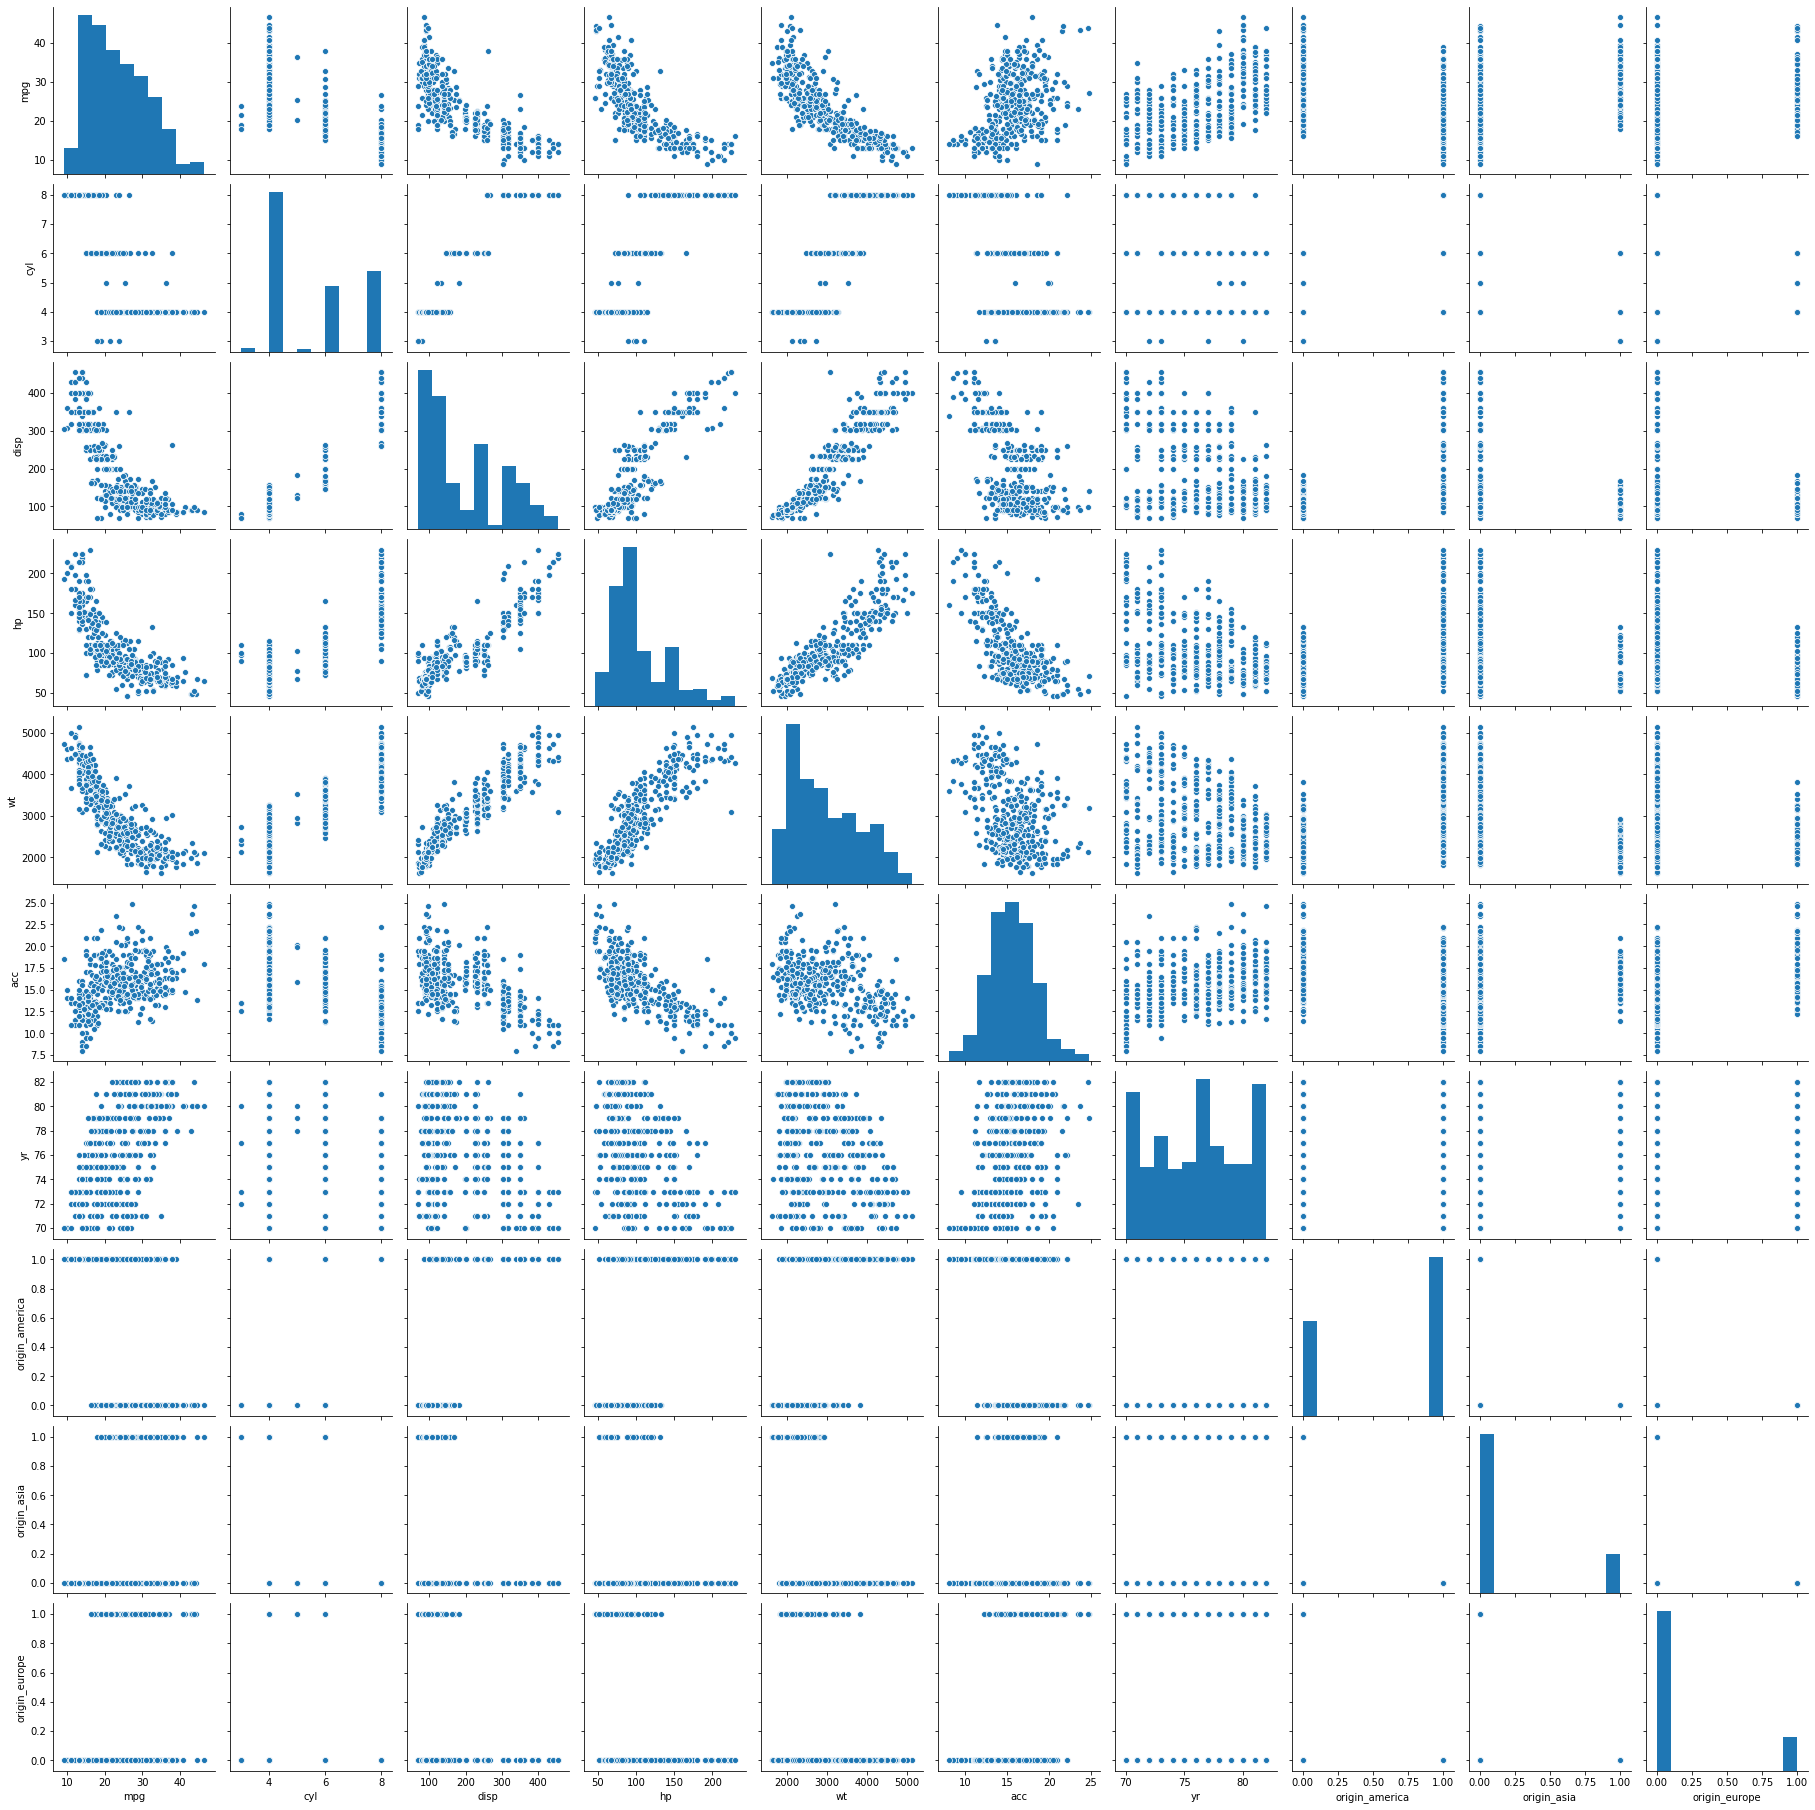

In [98]:
sns.pairplot(mpg_df)

In [96]:
##Dropping the car Name column:

mpg_df = mpg_df.drop('car name', axis=1)

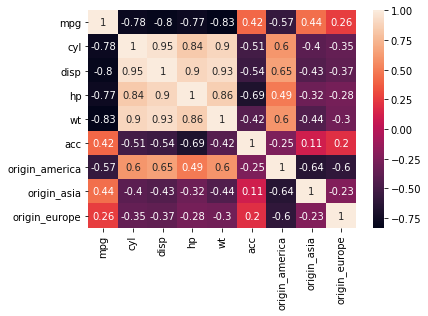

In [99]:
sns.heatmap(mpg_df.corr(),annot=True)

From the above correlation matrix, it is visible that the variable "wt" is the most correlated variable w.r.t mpg.
Hence use wt as independent variable and mpg as dependent variable for univariate analysis

## Univariate Regression

In [100]:
# independent variable for Univariate Analysis
X = mpg_df[['wt']]

# dependent variable
y = mpg_df[['mpg']]

In [101]:
#Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
X_sc = scaler.fit_transform(X)
y_sc = scaler.fit_transform(y)

In [102]:
# Split X and y into training and test set in 80:20 ratio

X_train, X_test, y_train, y_test = train_test_split(X_sc, y_sc, test_size=0.20, random_state=15)

In [103]:
# Create linear regression object

LR_model = LinearRegression()
LR_model.fit(X_train, y_train)
# Make predictions using the testing set
y_pred = LR_model.predict(X_test)

In [104]:
for idx, col_name in enumerate(X.columns):
    print("The coefficient for {} is {}".format(col_name, LR_model.coef_[0][idx]))

The coefficient for wt is -0.7140577001895132


In [105]:
#intercept for the model

intercept = LR_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 0.6554783311049968


In [106]:
# Model score - R2 or coeff of determinant

r2_score(y_test,y_pred)

0.6837317788727048

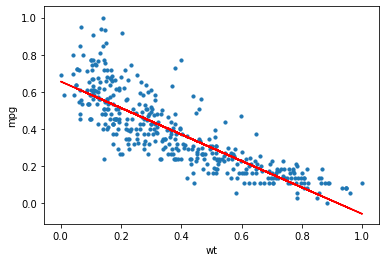

In [107]:
# data points
plt.scatter(X_sc, y_sc, s=10)
plt.xlabel('wt')
plt.ylabel('mpg')

# predicted values
plt.plot(X_test, y_pred, color='r')
plt.show()

## Multivariate Regression

In [108]:
# Copy all the predictor variables into X dataframe. These are the independent variable
X = mpg_df.drop('mpg', axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = mpg_df[['mpg']]

In [109]:
#Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
X_sc = scaler.fit_transform(X)
y_sc = scaler.fit_transform(y)

#X_sc1=pd.DataFrame(X_sc,columns=X.columns)
#y_sc1=pd.DataFrame(y_sc,columns=y.columns)

In [110]:
# Split X and y into training and test set in 80:20 ratio

X_train, X_test, y_train, y_test = train_test_split(X_sc, y_sc, test_size=0.20, random_state=15)

In [111]:
# Create linear regression object

LR_model = LinearRegression()
LR_model.fit(X_train, y_train)
# Make predictions using the testing set
y_pred = LR_model.predict(X_test)

In [112]:
for idx, col_name in enumerate(X.columns):
    print("The coefficient for {} is {}".format(col_name, LR_model.coef_[0][idx]))

The coefficient for cyl is -0.01574097255593949
The coefficient for disp is 0.1665188465511043
The coefficient for hp is -0.02399419680481316
The coefficient for wt is -0.6482973655113854
The coefficient for acc is 0.04218415311783793
The coefficient for yr is 0.25183065759240475
The coefficient for origin_america is -0.05044528396566843
The coefficient for origin_asia is 0.023375253948062186
The coefficient for origin_europe is 0.02707003001760449


In [113]:
#intercept for the model

intercept = LR_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 0.4709470429746048


In [114]:
# Model score - R2 or coeff of determinant

r2_score(y_test,y_pred)

0.8081425854477834

In [122]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,0.638298,0.647492
1,0.398936,0.372061
2,0.598404,0.595074
3,0.053191,0.033366
4,0.611702,0.565584
...,...,...
75,0.297872,0.313543
76,0.132979,0.073768
77,0.720745,0.653852
78,0.478723,0.540225


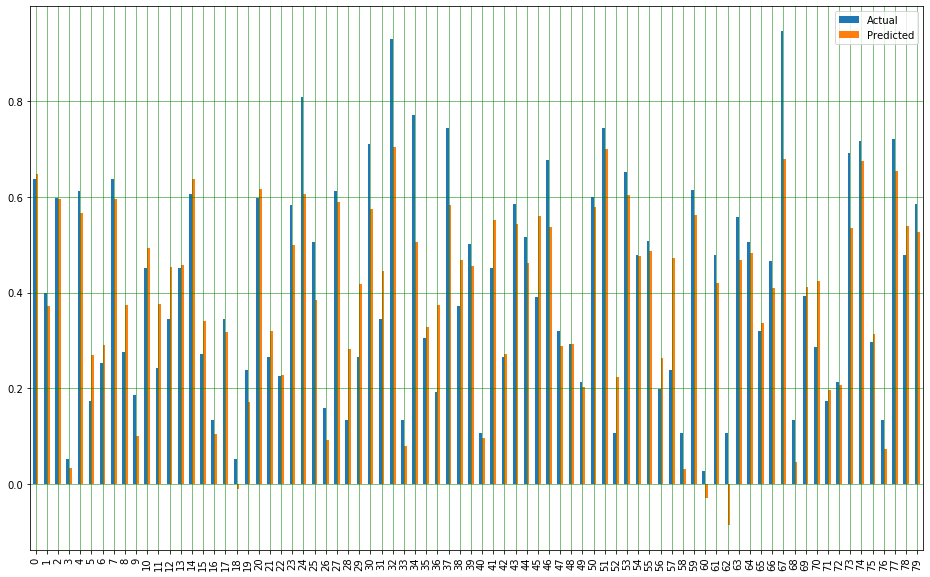

In [116]:
df1 = df
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

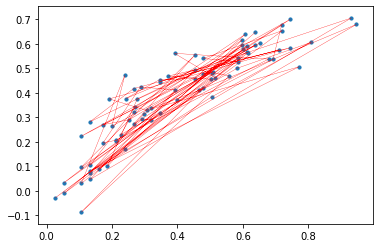

In [121]:
# Plot outputs
plt.scatter(y_test, y_pred, s=10)
plt.plot(y_test, y_pred, linewidth=0.3,color='r')

plt.show()

## KNN

In [154]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

### Data Preparation

In [136]:
# reading the CSV file into pandas dataframe
haber_df = pd.read_csv("haberman.csv")

haber_df.shape

(306, 4)

In [137]:
haber_df.head(10)

,Age,Op_Year,axil_nodes,Surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [138]:
haber_df.describe()

,Age,Op_Year,axil_nodes,Surv_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [139]:
haber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Age          306 non-null    int64
 1   Op_Year      306 non-null    int64
 2   axil_nodes   306 non-null    int64
 3   Surv_status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


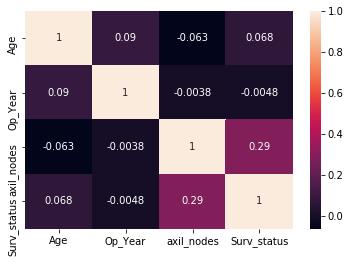

In [141]:
sns.heatmap(haber_df.corr(),annot=True)

In [142]:
#Convert Surv_Status to category:
haber_df['Surv_status']=haber_df['Surv_status'].astype('category')

In [143]:
haber_df['Op_Year'].unique()

array([64, 62, 65, 59, 58, 60, 66, 61, 67, 63, 69, 68], dtype=int64)

In [144]:
haber_df['Op_Year']=haber_df['Op_Year'].astype('category')

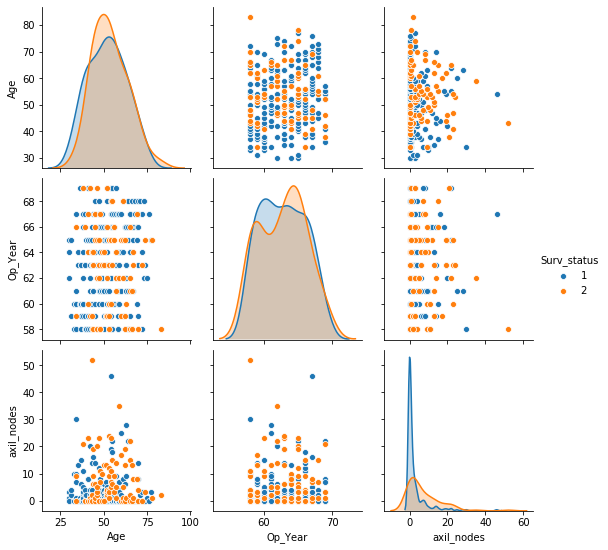

In [145]:
sns.pairplot(haber_df,hue="Surv_status")

In [146]:
haber_df.isna().sum() #No missing Value in any of the columns

Age            0
Op_Year        0
axil_nodes     0
Surv_status    0
dtype: int64

1. Target Variable: Surv_Status(1 = the patient survived 5 years or longer & 2 = the patient died within 5 year)
2. Independent variables: Age, Op_Year, axil_nodes

### Split data into Train and Test 

In [147]:
# Copy all the predictor variables into X dataframe. These are the independent variable
X = haber_df.drop('Surv_status', axis=1)

# Copy the 'Surv_status' column alone into the y dataframe. This is the dependent variable
y = haber_df[['Surv_status']]

In [152]:
#Split the file into train [80%] and test [20%] data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=9)

In [150]:
##Scaling the data
sc=StandardScaler()
sc.fit(X_train)
scaledX_train = sc.transform(X_train)
scaledX_test = sc.transform(X_test)

### Apply KNN algorithm on Trained set, predict the X_test and check Accuracy

In [158]:
K_range=[1,3,5,7,9,11,13,15,20,25]
for k in K_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    print('accuracy score for k=',k,'is', accuracy_score(y_test, y_pred))

accuracy score for k= 1 is 0.6451612903225806
accuracy score for k= 3 is 0.6774193548387096
accuracy score for k= 5 is 0.7258064516129032
accuracy score for k= 7 is 0.7258064516129032
accuracy score for k= 9 is 0.7258064516129032
accuracy score for k= 11 is 0.7903225806451613
accuracy score for k= 13 is 0.7903225806451613
accuracy score for k= 15 is 0.8064516129032258
accuracy score for k= 20 is 0.8064516129032258
accuracy score for k= 25 is 0.8064516129032258


C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

The accuracy scores are almost constant from k=11